In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import necessary modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get the path of our training and our test datasets, and load them to pandas dataframe
data_path = '/content/drive/MyDrive/CS492 term project datasets'
train_path = os.path.join(data_path, 'train.csv')
test_path = os.path.join(data_path, 'test.csv') # only used for test purposes, when we submit our final csv file

In [ ]:
df = pd.read_csv(train_path)
df

,ID,IssueDateTime,DeclarationOfficeID,ProcessType,TransactionNature,Type,PaymentType,BorderTransportMeans,DeclarerID,ImporterID,...,ExpressID,ClassificationID,ExportationCountry,OriginCountry,TaxRate,DutyRegime,DisplayIndicator,TotalGrossMassMeasure(KG),AdValoremTaxBaseAmount(Won),Fake
0,72084586,2020-01-01,40,B,55,21,11,40,9GW1AOD,BMWKZKI,...,NaN,9619001090,JP,JP,0.0,C,B,5742.6,2274643.86,0
1,40435069,2020-01-01,40,B,11,21,11,40,7GHJ33J,VFJGVDY,...,NaN,9506910000,CN,CN,8.0,A,Y,21.0,285.60,0
2,55727128,2020-01-01,21,B,15,11,11,10,CSYO98C,M9O8BKE,...,MWIDNS,1201903000,CN,CN,5.0,W1,E,38000.0,16302000.00,0
3,59584234,2020-01-01,30,B,11,21,11,40,IL0ECV3,H920U30,...,NaN,6504000000,CN,CN,0.0,FCN1,E,798.0,49635.60,0
4,81704651,2020-01-01,33,B,11,21,11,30,YFZ49RP,O4IUH56,...,NaN,8504502090,HK,CN,2.2,CIT,G,170.9,24917.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,97825407,2020-12-31,20,B,15,21,13,10,A7POIBB,CL38DL7,...,NaN,6204420000,CN,CN,5.2,FCN1,B,10.0,583.00,0
37818,52016133,2020-12-31,10,B,11,21,11,10,JIHZF3K,37V8B48,...,NaN,8523521000,CN,CN,0.0,CIT,B,7.0,14179.20,0
37819,47048702,2020-12-31,13,B,94,21,11,40,MBMUR6B,NK3WFQM,...,NaN,2204212000,FR,FR,0.0,FEU1,E,1728.0,41472.00,0
37820,30000766,2020-12-31,40,B,11,21,11,10,AX4CW6G,9FP5BBC,...,NaN,9018509000,JP,JP,1.3,C,Y,5.0,8630.50,1


Dealing with missing values

In [ ]:
# columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

SellerID               3916
ExpressID             29504
ExportationCountry        1
OriginCountry             1
dtype: int64

In [ ]:
# percentage of the missing values from each column
perc_Seller = len(df[df['SellerID'].isnull()])/len(df)
perc_Express = len(df[df['ExpressID'].isnull()])/len(df)
print(f'SellerID has {perc_Seller * 100:2f}% null values')
print(f'ExpressID has {perc_Express * 100:2f}% null values')

SellerID has 10.353762% null values
ExpressID has 78.007509% null values


In [ ]:
# as we can see most of the data points in the column 'ExpressID' are null values
# therefore, we can try 3 approaches here.
# Approach 1 -> assigning 1 category for each 'nan' value
# Approach 2 -> Dropping that nan value
# Approach 3 -> Imputation
# for 'ExportationCountry' and 'OriginCountry', we can definitely try imputation. because they only have 1 missing valoues
# for 'SellerID' we can also try imputation, but for the ExpressID, we will decide

In [ ]:
#let's try dropping seller ID and expressID => remember to try a second approach, by making 'nan' one variable
dropped_df = df.drop(columns=['SellerID', 'ExpressID'])
dropped_df

,ID,IssueDateTime,DeclarationOfficeID,ProcessType,TransactionNature,Type,PaymentType,BorderTransportMeans,DeclarerID,ImporterID,ClassificationID,ExportationCountry,OriginCountry,TaxRate,DutyRegime,DisplayIndicator,TotalGrossMassMeasure(KG),AdValoremTaxBaseAmount(Won),Fake
0,72084586,2020-01-01,40,B,55,21,11,40,9GW1AOD,BMWKZKI,9619001090,JP,JP,0.0,C,B,5742.6,2274643.86,0
1,40435069,2020-01-01,40,B,11,21,11,40,7GHJ33J,VFJGVDY,9506910000,CN,CN,8.0,A,Y,21.0,285.60,0
2,55727128,2020-01-01,21,B,15,11,11,10,CSYO98C,M9O8BKE,1201903000,CN,CN,5.0,W1,E,38000.0,16302000.00,0
3,59584234,2020-01-01,30,B,11,21,11,40,IL0ECV3,H920U30,6504000000,CN,CN,0.0,FCN1,E,798.0,49635.60,0
4,81704651,2020-01-01,33,B,11,21,11,30,YFZ49RP,O4IUH56,8504502090,HK,CN,2.2,CIT,G,170.9,24917.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,97825407,2020-12-31,20,B,15,21,13,10,A7POIBB,CL38DL7,6204420000,CN,CN,5.2,FCN1,B,10.0,583.00,0
37818,52016133,2020-12-31,10,B,11,21,11,10,JIHZF3K,37V8B48,8523521000,CN,CN,0.0,CIT,B,7.0,14179.20,0
37819,47048702,2020-12-31,13,B,94,21,11,40,MBMUR6B,NK3WFQM,2204212000,FR,FR,0.0,FEU1,E,1728.0,41472.00,0
37820,30000766,2020-12-31,40,B,11,21,11,10,AX4CW6G,9FP5BBC,9018509000,JP,JP,1.3,C,Y,5.0,8630.50,1


In [ ]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37822 entries, 0 to 37821
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           37822 non-null  int64  
 1   IssueDateTime                37822 non-null  object 
 2   DeclarationOfficeID          37822 non-null  int64  
 3   ProcessType                  37822 non-null  object 
 4   TransactionNature            37822 non-null  int64  
 5   Type                         37822 non-null  int64  
 6   PaymentType                  37822 non-null  int64  
 7   BorderTransportMeans         37822 non-null  int64  
 8   DeclarerID                   37822 non-null  object 
 9   ImporterID                   37822 non-null  object 
 10  ClassificationID             37822 non-null  int64  
 11  ExportationCountry           37821 non-null  object 
 12  OriginCountry                37821 non-null  object 
 13  TaxRate         

In [ ]:
# impute 'ExportationCountry' and 'OriginCountry' with the mode
dropped_df['ExportationCountry'].fillna(dropped_df['ExportationCountry'].mode()[0], inplace=True)
dropped_df['OriginCountry'].fillna(dropped_df['OriginCountry'].mode()[0], inplace=True)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37822 entries, 0 to 37821
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           37822 non-null  int64  
 1   IssueDateTime                37822 non-null  object 
 2   DeclarationOfficeID          37822 non-null  int64  
 3   ProcessType                  37822 non-null  object 
 4   TransactionNature            37822 non-null  int64  
 5   Type                         37822 non-null  int64  
 6   PaymentType                  37822 non-null  int64  
 7   BorderTransportMeans         37822 non-null  int64  
 8   DeclarerID                   37822 non-null  object 
 9   ImporterID                   37822 non-null  object 
 10  ClassificationID             37822 non-null  int64  
 11  ExportationCountry           37822 non-null  object 
 12  OriginCountry                37822 non-null  object 
 13  TaxRate         

* issue datatime, divide to year, month, and day, omit day, since it nearly has no factor, then see year vs fake, definitely include month as categorical discrete
* declaration office ID -> discrete categorical many variables -> pd.factorize (may be one hot and PCA)
* processtype -> change to numerical discrete categorical -> pd.factorize (may be one hot encoding)
* transaction nature -> from 11 to 100, types of transactions when the good is being imported -> may be factorize, (one hot and PCA)
* type -> the same as transaction nature, this one has less number of unique values
* payment type -> skipped label encoding, may be pd.factorize
* BorderTransportMeans -> numerical categorical -> pd.factorize/one-hot-encoding
* declarerID, importedID -> see if we can factorize -> may be drop :(
* classificationID -> take the first 2 digits, and pd.factorize as in HW2
* Exportation country -> pd.factorize, change it to lable encoding, may group into continents
* origin country -> if there is high correlation among the 2, drop this one, may be add another feature, 'also origin' if the rate increases
* Tax Rate -> continuous, use it as it is / group it to different ranges / correlate with AdValoremTaxBase amount
* display indicator -> pd.factorize whether you should display country of origin
* duty regime -> grouping of different taxes, may be drop tax, or group the taxes based on this scaling, may be take the first word only, (one hot and PCA)
* TotalGrossMass -> use it as continuous / see the distribution / classify it to bins
* AdValoremTax base -> may be highly correlated with 'tax_rate' if so, drop one of them, group into bins, use it as it is
* at LAST we have 'fake' -> the label

In [ ]:
dropped_df.describe()

,ID,DeclarationOfficeID,TransactionNature,Type,PaymentType,BorderTransportMeans,ClassificationID,TaxRate,TotalGrossMassMeasure(KG),AdValoremTaxBaseAmount(Won),Fake
count,3.782200e+04,37822.000000,37822.000000,37822.000000,37822.000000,37822.000000,3.782200e+04,37822.000000,3.782200e+04,3.782200e+04,37822.000000
mean,5.484918e+07,33.402967,23.108138,20.744382,16.653852,23.762361,6.151847e+09,7.769364,2.089458e+04,8.395763e+06,0.215536
std,2.604988e+07,20.203567,27.658170,2.787659,11.559300,16.325896,2.657450e+09,27.129084,3.653169e+05,2.707199e+08,0.411199
min,1.000299e+07,10.000000,11.000000,11.000000,0.000000,10.000000,1.012910e+08,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.228237e+07,20.000000,11.000000,21.000000,11.000000,10.000000,3.926909e+09,0.000000,1.000000e+01,4.808000e+02,0.000000
50%,5.473951e+07,30.000000,11.000000,21.000000,11.000000,10.000000,6.402200e+09,4.900000,1.055000e+02,9.867300e+03,0.000000
75%,7.757293e+07,40.000000,11.000000,21.000000,14.000000,40.000000,8.518909e+09,8.000000,1.551125e+03,2.667600e+05,0.000000
max,9.999891e+07,154.000000,100.000000,35.000000,43.000000,90.000000,9.706009e+09,800.300000,2.999470e+07,1.744606e+10,1.000000


In [ ]:
# take a statistical analysis, perhaps on the numerical continuous columns
numerical_cols = [col for col in dropped_df.columns if dropped_df[col].dtype == 'float64']

['TaxRate', 'TotalGrossMassMeasure(KG)', 'AdValoremTaxBaseAmount(Won)']


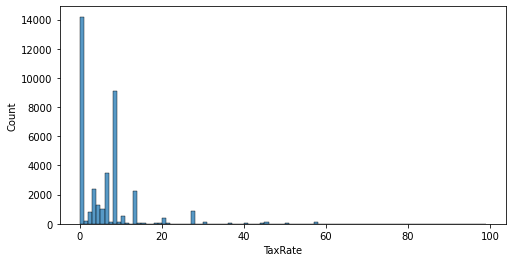

In [ ]:
# plot distribution for each of the numerical features
print(numerical_cols)
plt.figure(figsize=(8, 4))
sns.histplot(dropped_df['TaxRate'], bins=range(0, 100, 1))

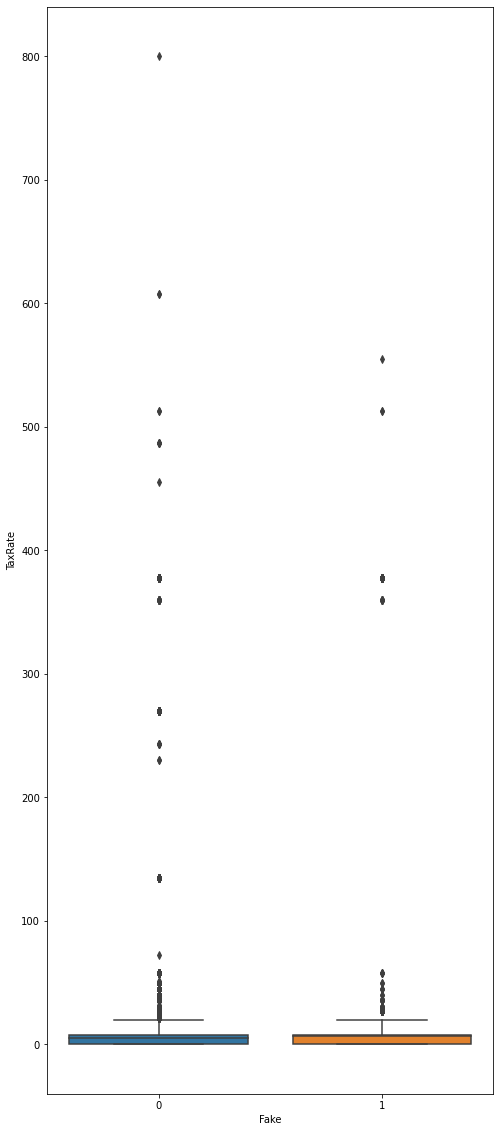

In [ ]:
plt.figure(figsize=(8, 20))
sns.boxplot(x='Fake', y='TaxRate', data=dropped_df)

In [ ]:
dropped_df.groupby('Fake')['TaxRate'].describe()

,count,mean,std,min,25%,50%,75%,max
Fake,,,,,,,,
0,29670.0,7.792373,26.055832,0.0,0.0,4.8,8.0,800.3
1,8152.0,7.685623,30.721950,0.0,0.0,6.5,8.0,554.8


In [ ]:
# dropped_df["TaxRate"] = pd.cut(dropped_df["TaxRate"],
#                                bins=[-1, 2.5, 6.5, 11.5, np.inf],
#                                labels=[1, 2, 3, 4])
# dropped_df['TaxRate'].hist()

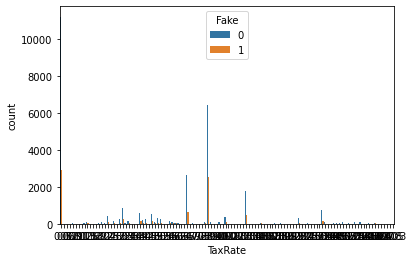

In [ ]:
sns.countplot(x='TaxRate', hue='Fake', data=dropped_df)

(array([798., 284., 291., 325., 538., 116., 215., 119., 833., 117.,  92.,
         86., 228.,  83.,  95.,  43., 635.,  64.,  42.,  52., 152.,  59.,
         27.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
        1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125,
        2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875]),
 <a list of 23 Patch objects>)

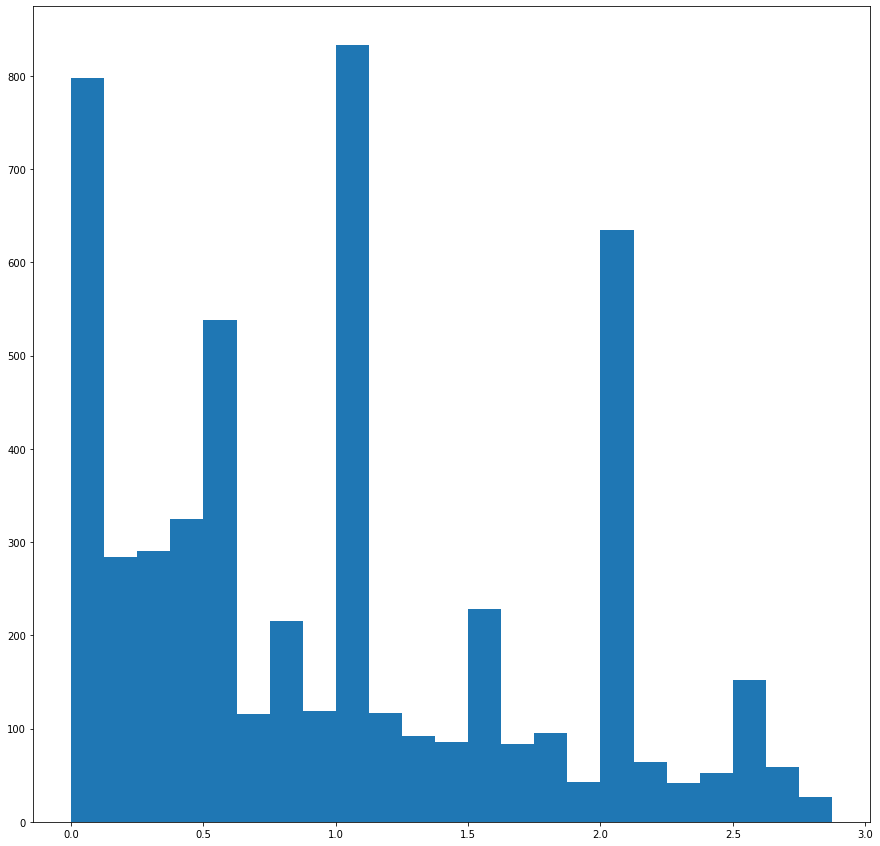

In [ ]:
plt.figure(figsize=(15, 15))
plt.hist(dropped_df['TotalGrossMassMeasure(KG)'], bins=list(np.arange(0, 3, 0.125)))
# plt.figure(figsize=(8, 20))
# sns.boxplot(x='Fake', y='TaxRate', data=dropped_df)
# dropped_df.groupby('Fake')['TaxRate'].describe()

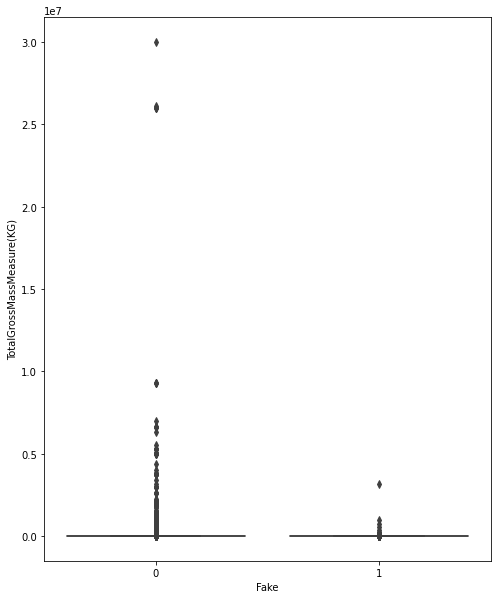

In [ ]:
plt.figure(figsize=(8, 10))
sns.boxplot(x='Fake', y='TotalGrossMassMeasure(KG)', data=dropped_df)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dropped_df['TotalGrossMassMeasure(KG)'] = scaler.fit_transform(np.array(dropped_df['TotalGrossMassMeasure(KG)']).reshape(-1, 1))
# dropped_df['TotalGrossMassMeasure(KG)']

In [ ]:
# from scipy import stats # remove outliers -> replace them using median
# z_scores = stats.zscore(dropped_df['TotalGrossMassMeasure(KG)'])
# # dropped_df['z_score'] = np.abs(z_scores)
# # calculate z-scores of `df`
# median = dropped_df['TotalGrossMassMeasure(KG)'].median()
# abs_z_scores = np.abs(z_scores)
# print(dropped_df.shape)
# # dropped_df[abs_z_scores > 3]['TotalGrossMassMeasure(KG)'] = np.nan
# dropped_df['TotalGrossMassMeasure(KG)'][abs_z_scores > 3] = np.nan
# dropped_df['TotalGrossMassMeasure(KG)'].fillna(median, inplace=True)
# # dropped_df['TotalGrossMassMeasure(KG)'][abs_z_scores > 3]
# # dropped_df['TotalGrossMassMeasure(KG)'].fillna(median, inplace=True)

In [ ]:
dropped_df['Fake'].corr(dropped_df['TotalGrossMassMeasure(KG)'])

-0.023885525798128793

In [ ]:
#now, let's see the average value of the numerical variables who survive
dropped_df.groupby('Fake')['TotalGrossMassMeasure(KG)'].describe()

,count,mean,std,min,25%,50%,75%,max
Fake,,,,,,,,
0,29670.0,25468.332029,411776.710414,0.0,11.5,136.9,2173.225,29994700.0
1,8152.0,4247.983219,41295.744636,0.0,7.0,50.5,400.000,3162500.0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dropped_df['AdValoremTaxBaseAmount(Won)'] = scaler.fit_transform(np.array(dropped_df['AdValoremTaxBaseAmount(Won)']).reshape(-1, 1))
# dropped_df['AdValoremTaxBaseAmount(Won)']

In [ ]:
# from scipy import stats # remove outliers -> replace them using median
# z_scores = stats.zscore(dropped_df['AdValoremTaxBaseAmount(Won)'])
# # dropped_df['z_score'] = np.abs(z_scores)
# # calculate z-scores of `df`
# median = dropped_df['AdValoremTaxBaseAmount(Won)'].median()
# abs_z_scores = np.abs(z_scores)
# print(dropped_df.shape)
# # dropped_df[abs_z_scores > 3]['AdValoremTaxBaseAmount(Won)'] = np.nan
# dropped_df['AdValoremTaxBaseAmount(Won)'][abs_z_scores > 3] = np.nan
# dropped_df['AdValoremTaxBaseAmount(Won)'].fillna(median, inplace=True)
# # dropped_df['AdValoremTaxBaseAmount(Won)'][abs_z_scores > 3]
# # dropped_df['AdValoremTaxBaseAmount(Won)'].fillna(median, inplace=True)

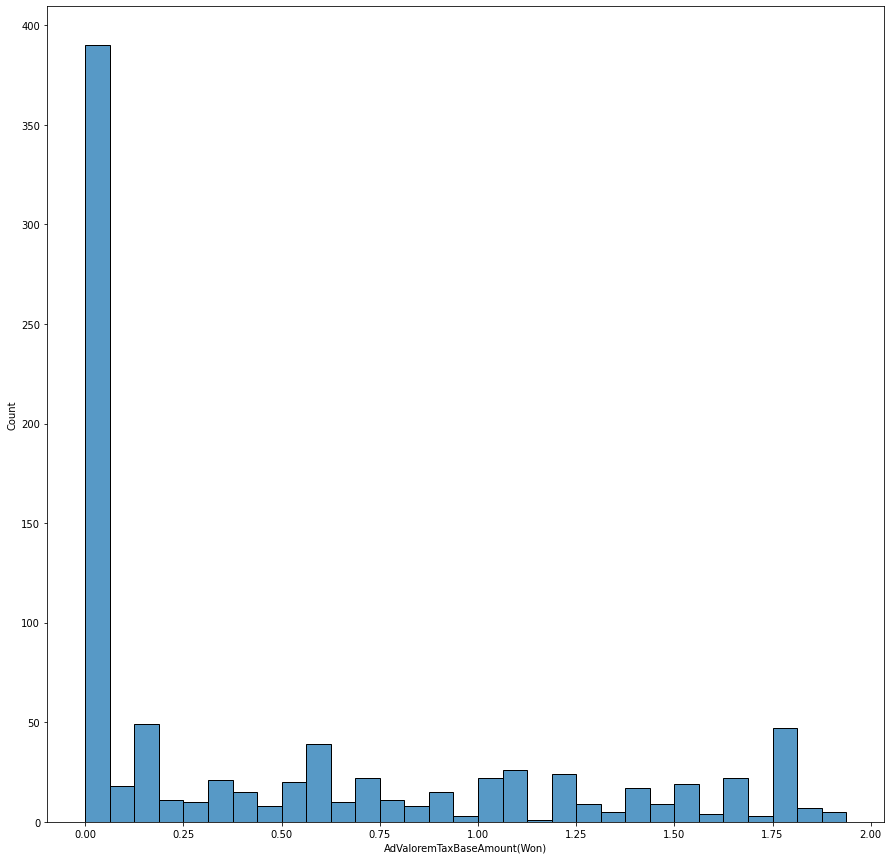

In [ ]:
plt.figure(figsize=(15, 15))
sns.histplot(dropped_df['AdValoremTaxBaseAmount(Won)'], bins=list(np.arange(0, 2, 0.0625)))

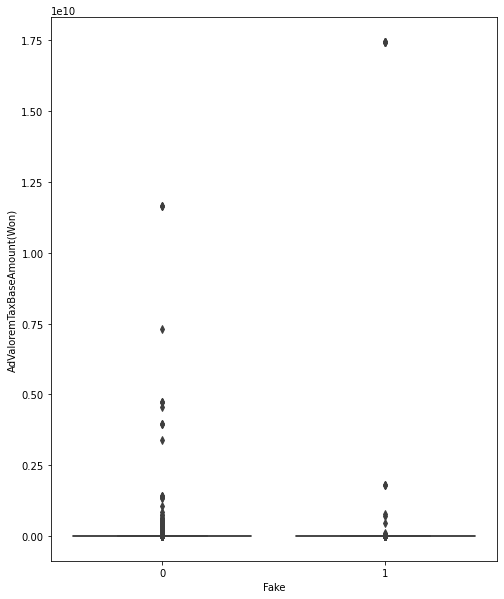

In [ ]:
plt.figure(figsize=(8, 10))
sns.boxplot(x='Fake', y='AdValoremTaxBaseAmount(Won)', data=dropped_df)

In [ ]:
dropped_df['Fake'].corr(dropped_df['AdValoremTaxBaseAmount(Won)'])

0.01650379793482723

In [ ]:
dropped_df.groupby('Fake')['AdValoremTaxBaseAmount(Won)'].describe()

,count,mean,std,min,25%,50%,75%,max
Fake,,,,,,,,
0,29670.0,6.053845e+06,1.459032e+08,0.0,552.480,13333.35,401747.500,1.166235e+10
1,8152.0,1.691940e+07,5.123349e+08,0.0,314.025,4262.00,68860.625,1.744606e+10


In [ ]:
# how about normalizing using 'standardscaler'
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
df_normed = dropped_df.copy()
df_normed.corr()
# df_normed[numerical_cols] = scaler.fit_transform(dropped_df[numerical_cols])
# df_normed[numerical_cols].corr()

,ID,DeclarationOfficeID,TransactionNature,Type,PaymentType,BorderTransportMeans,ClassificationID,TaxRate,TotalGrossMassMeasure(KG),AdValoremTaxBaseAmount(Won),Fake
ID,1.000000,-0.001201,-0.002875,-0.004814,0.004960,-0.002794,-0.000515,-0.001544,-0.001451,0.002597,-0.003119
DeclarationOfficeID,-0.001201,1.000000,0.034651,0.010623,0.017981,0.038247,0.003034,-0.004244,-0.000802,-0.006498,-0.008946
TransactionNature,-0.002875,0.034651,1.000000,-0.019829,0.037892,0.028851,0.002714,-0.014443,-0.009513,0.003201,0.005769
Type,-0.004814,0.010623,-0.019829,1.000000,-0.005935,-0.008456,-0.003690,0.002128,0.007980,-0.001569,-0.006901
PaymentType,0.004960,0.017981,0.037892,-0.005935,1.000000,0.039475,-0.001570,-0.003479,-0.001841,-0.005085,-0.000552
BorderTransportMeans,-0.002794,0.038247,0.028851,-0.008456,0.039475,1.000000,-0.003454,-0.006590,-0.006585,-0.011971,0.004329
ClassificationID,-0.000515,0.003034,0.002714,-0.003690,-0.001570,-0.003454,1.000000,-0.251788,-0.057390,0.001445,0.100964
TaxRate,-0.001544,-0.004244,-0.014443,0.002128,-0.003479,-0.006590,-0.251788,1.000000,-0.003917,-0.003258,-0.001618
TotalGrossMassMeasure(KG),-0.001451,-0.000802,-0.009513,0.007980,-0.001841,-0.006585,-0.057390,-0.003917,1.000000,0.212738,-0.023886
AdValoremTaxBaseAmount(Won),0.002597,-0.006498,0.003201,-0.001569,-0.005085,-0.011971,0.001445,-0.003258,0.212738,1.000000,0.016504


In [ ]:
# now it's time to process each discrete categorical variables
#1. for 'issuedatetime', we can see that the year is all 2020, so it doesn't really have that much factor
# and we know that it's highly unlikely that certain days have high proportions of fake declarations,
# so we should remove 'days' too, and only keep the month, as one of our categorical and numerical columns
df_normed['IssueDateTime'] = pd.to_datetime(df_normed['IssueDateTime']).dt.month
df_normed

,ID,IssueDateTime,DeclarationOfficeID,ProcessType,TransactionNature,Type,PaymentType,BorderTransportMeans,DeclarerID,ImporterID,ClassificationID,ExportationCountry,OriginCountry,TaxRate,DutyRegime,DisplayIndicator,TotalGrossMassMeasure(KG),AdValoremTaxBaseAmount(Won),Fake
0,72084586,1,40,B,55,21,11,40,9GW1AOD,BMWKZKI,9619001090,JP,JP,0.0,C,B,5742.6,2274643.86,0
1,40435069,1,40,B,11,21,11,40,7GHJ33J,VFJGVDY,9506910000,CN,CN,8.0,A,Y,21.0,285.60,0
2,55727128,1,21,B,15,11,11,10,CSYO98C,M9O8BKE,1201903000,CN,CN,5.0,W1,E,38000.0,16302000.00,0
3,59584234,1,30,B,11,21,11,40,IL0ECV3,H920U30,6504000000,CN,CN,0.0,FCN1,E,798.0,49635.60,0
4,81704651,1,33,B,11,21,11,30,YFZ49RP,O4IUH56,8504502090,HK,CN,2.2,CIT,G,170.9,24917.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37817,97825407,12,20,B,15,21,13,10,A7POIBB,CL38DL7,6204420000,CN,CN,5.2,FCN1,B,10.0,583.00,0
37818,52016133,12,10,B,11,21,11,10,JIHZF3K,37V8B48,8523521000,CN,CN,0.0,CIT,B,7.0,14179.20,0
37819,47048702,12,13,B,94,21,11,40,MBMUR6B,NK3WFQM,2204212000,FR,FR,0.0,FEU1,E,1728.0,41472.00,0
37820,30000766,12,40,B,11,21,11,10,AX4CW6G,9FP5BBC,9018509000,JP,JP,1.3,C,Y,5.0,8630.50,1


In [ ]:
# Keep only the first two digits in the 'ClassificationID' attribute.
df_normed['ClassificationID'] = (df_normed['ClassificationID'] // (1e8)).astype(int)

In [ ]:
# Further classification needed
# df_normed['DutyRegime'] = df_normed['DutyRegime'].apply(lambda x : x[:-1] if x[-1].isnumeric() else x)
# df_normed['DutyRegime'].unique()

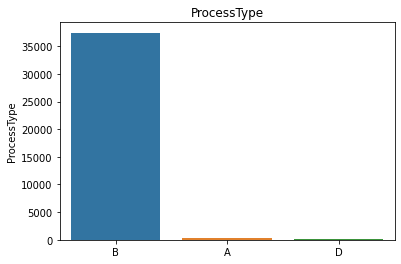

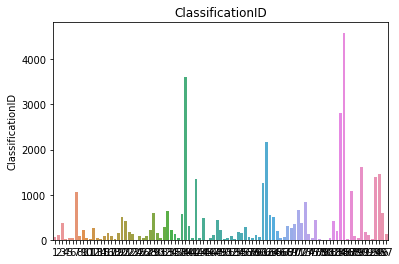

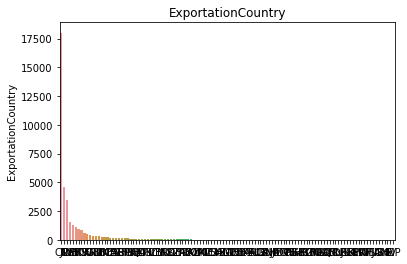

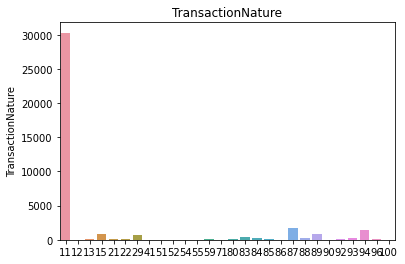

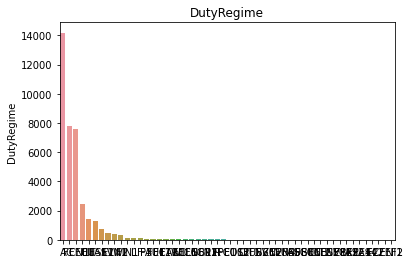

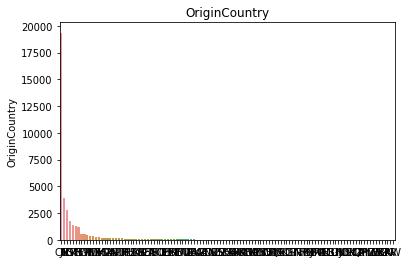

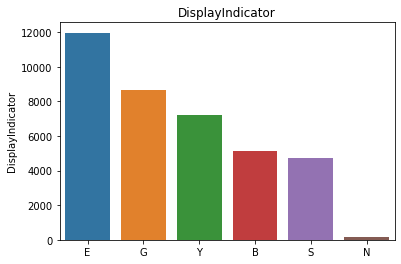

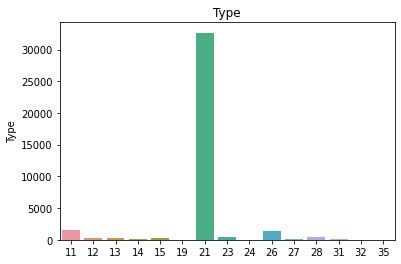

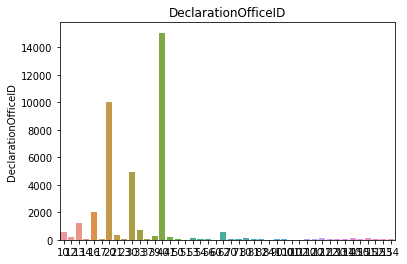

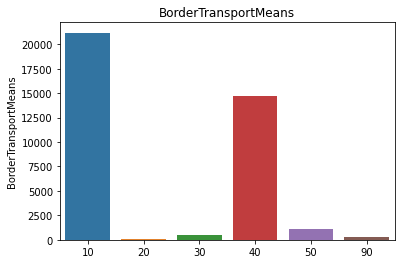

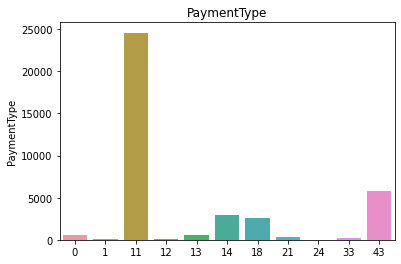

['ProcessType', 'ClassificationID', 'ExportationCountry', 'TransactionNature', 'DutyRegime', 'OriginCountry', 'DisplayIndicator', 'Type', 'DeclarationOfficeID', 'BorderTransportMeans', 'PaymentType']


In [ ]:
# let's include process type
# it's now time to process the categorical columns
# first, we'll build a barplot which shows the proportion of each categorical column
cat_columns = list(set(df_normed.columns) - set(numerical_cols) - set(['Fake', 'IssueDateTime', 'ID', 'DeclarerID', 'ImporterID']))
for col in cat_columns:
  sns.barplot(df_normed[col].value_counts().index, df_normed[col].value_counts()).set_title(col)
  plt.show()
print(cat_columns)

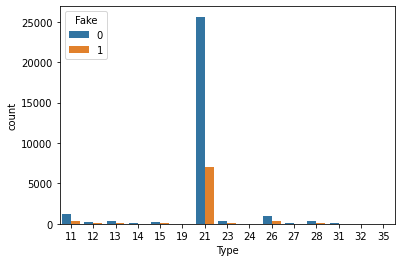

,Fake_percentage,value_counts
15,24.290221,317
19,24.242424,33
32,23.529412,34
11,23.426347,1541
12,22.748815,211
14,22.560976,164
26,22.137405,1310
28,21.585903,454
21,21.527246,32647
31,21.022727,176


In [ ]:
# let's draw the distribution of 'type' with 'fake'
sns.countplot(x='Type', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('Type')['Fake'].mean() * 100
value_counts = df_normed['Type'].value_counts().sort_index()
pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)

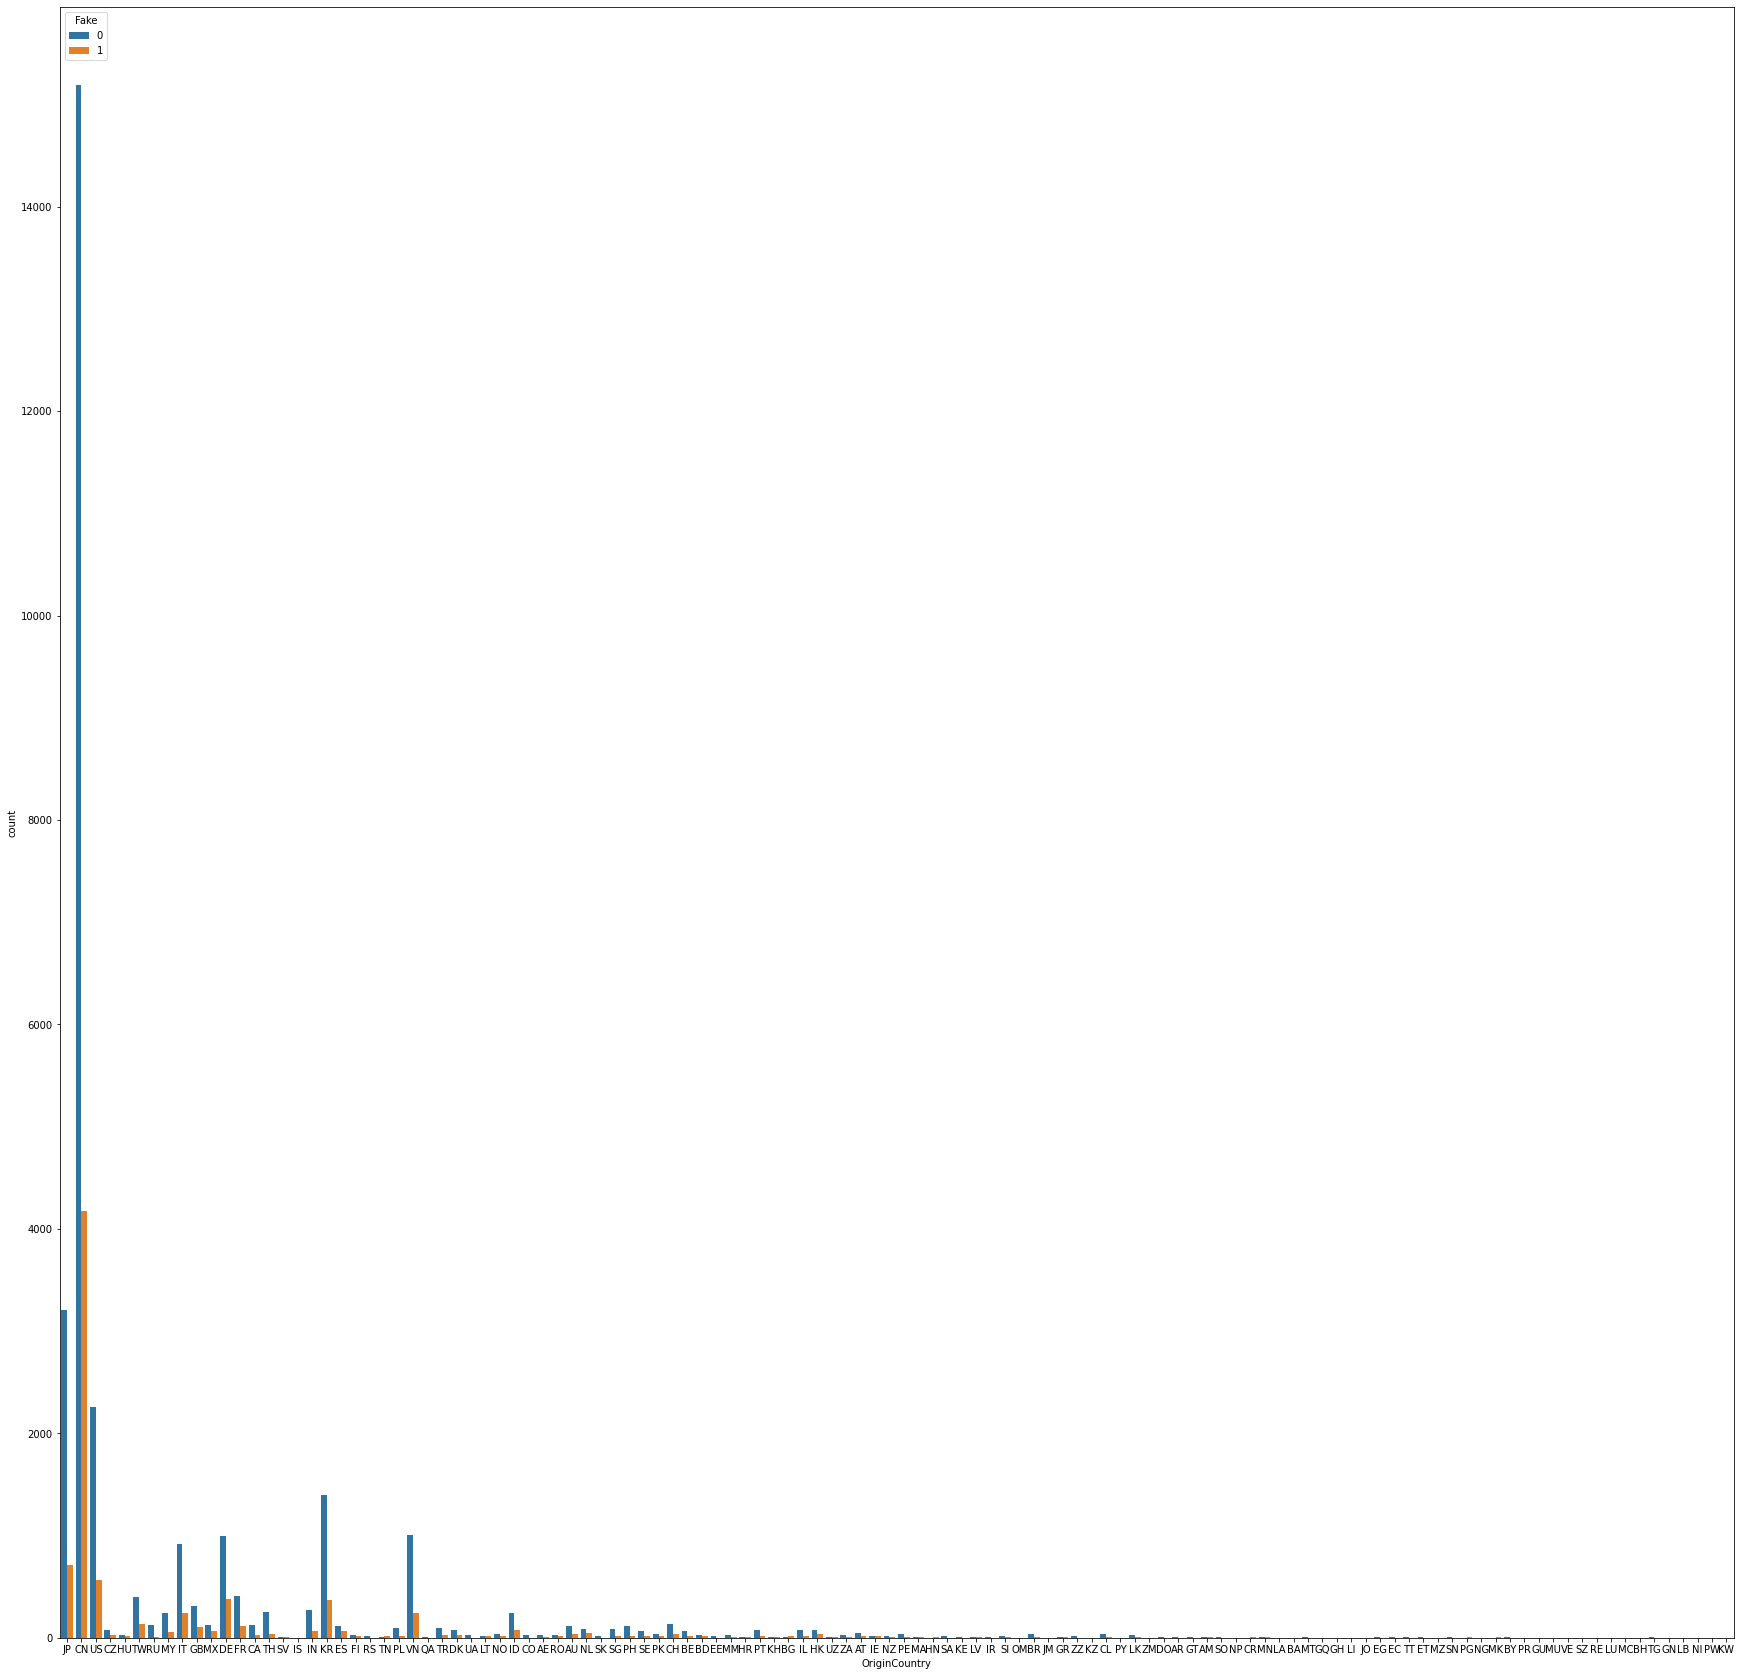

,Fake_percentage,value_counts
GN,100.0,2
BH,100.0,2
HN,100.0,4
PG,100.0,3
BA,100.0,1
...,...,...
LU,0.0,2
RE,0.0,2
QA,0.0,5
PY,0.0,2


In [ ]:
 # let's draw the distribution of 'type' with 'fake'
plt.figure(figsize=(30,30))
sns.countplot(x='OriginCountry', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('OriginCountry')['Fake'].mean() * 100
value_counts = df_normed['OriginCountry'].value_counts().sort_index()
pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)

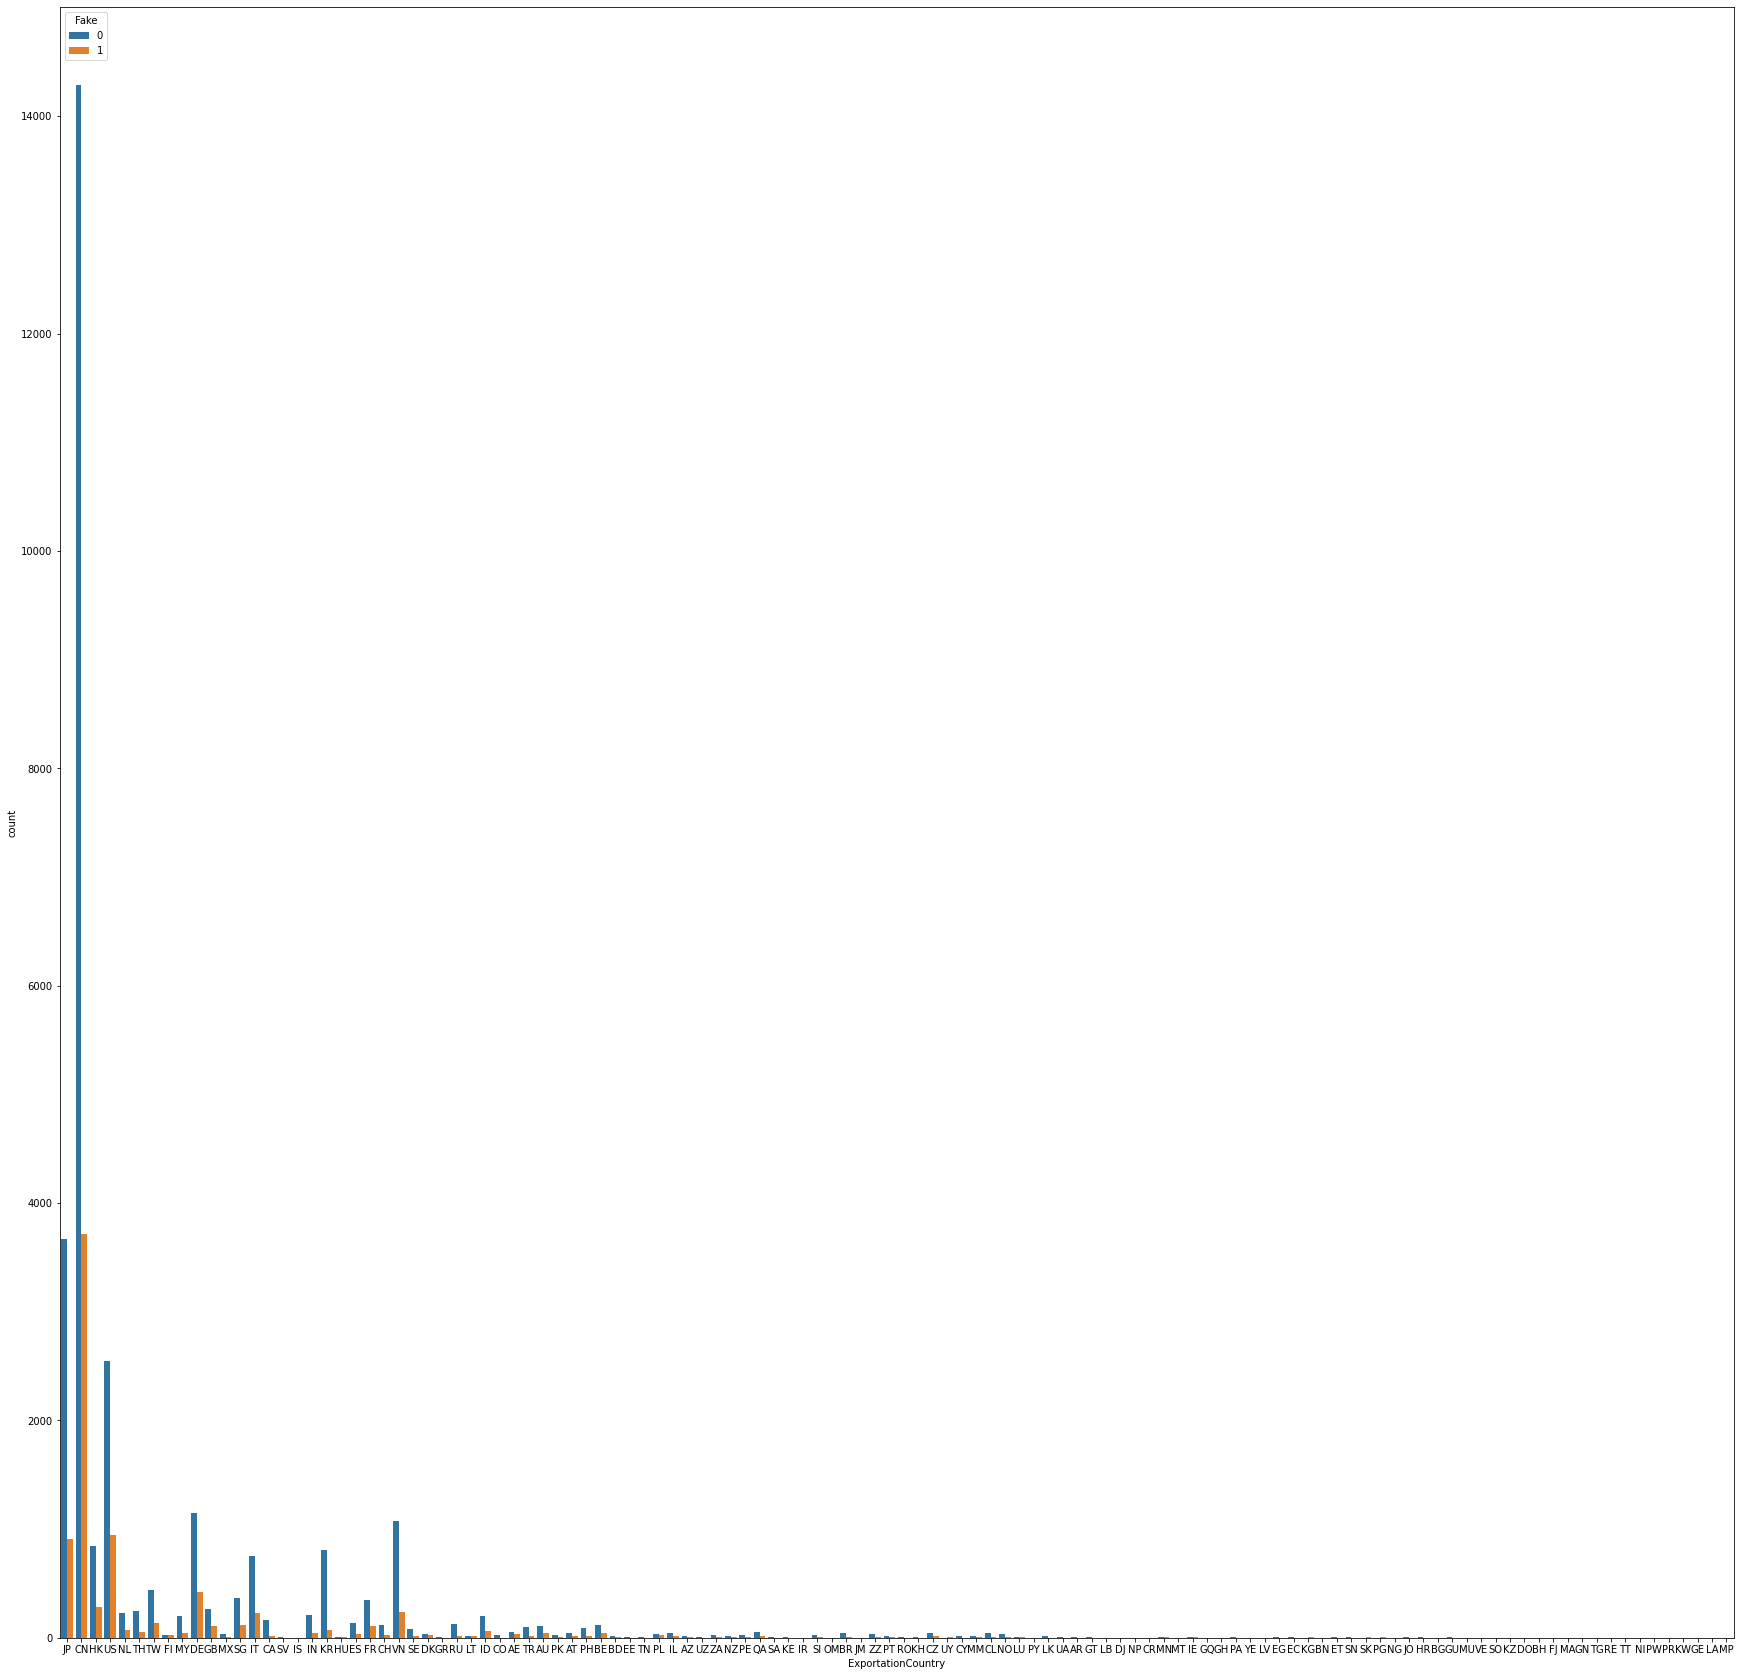

,Fake_percentage,value_counts
LA,100.0,1
BH,100.0,2
KG,100.0,3
KZ,100.0,2
LV,100.0,1
...,...,...
RE,0.0,1
RO,0.0,5
CY,0.0,12
SA,0.0,11


In [ ]:
# let's draw the distribution of 'ExportationCountry' with 'fake'
plt.figure(figsize=(30,30))
sns.countplot(x='ExportationCountry', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('ExportationCountry')['Fake'].mean() * 100
value_counts = df_normed['ExportationCountry'].value_counts().sort_index()
fake_vs_count = pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)
fake_vs_count

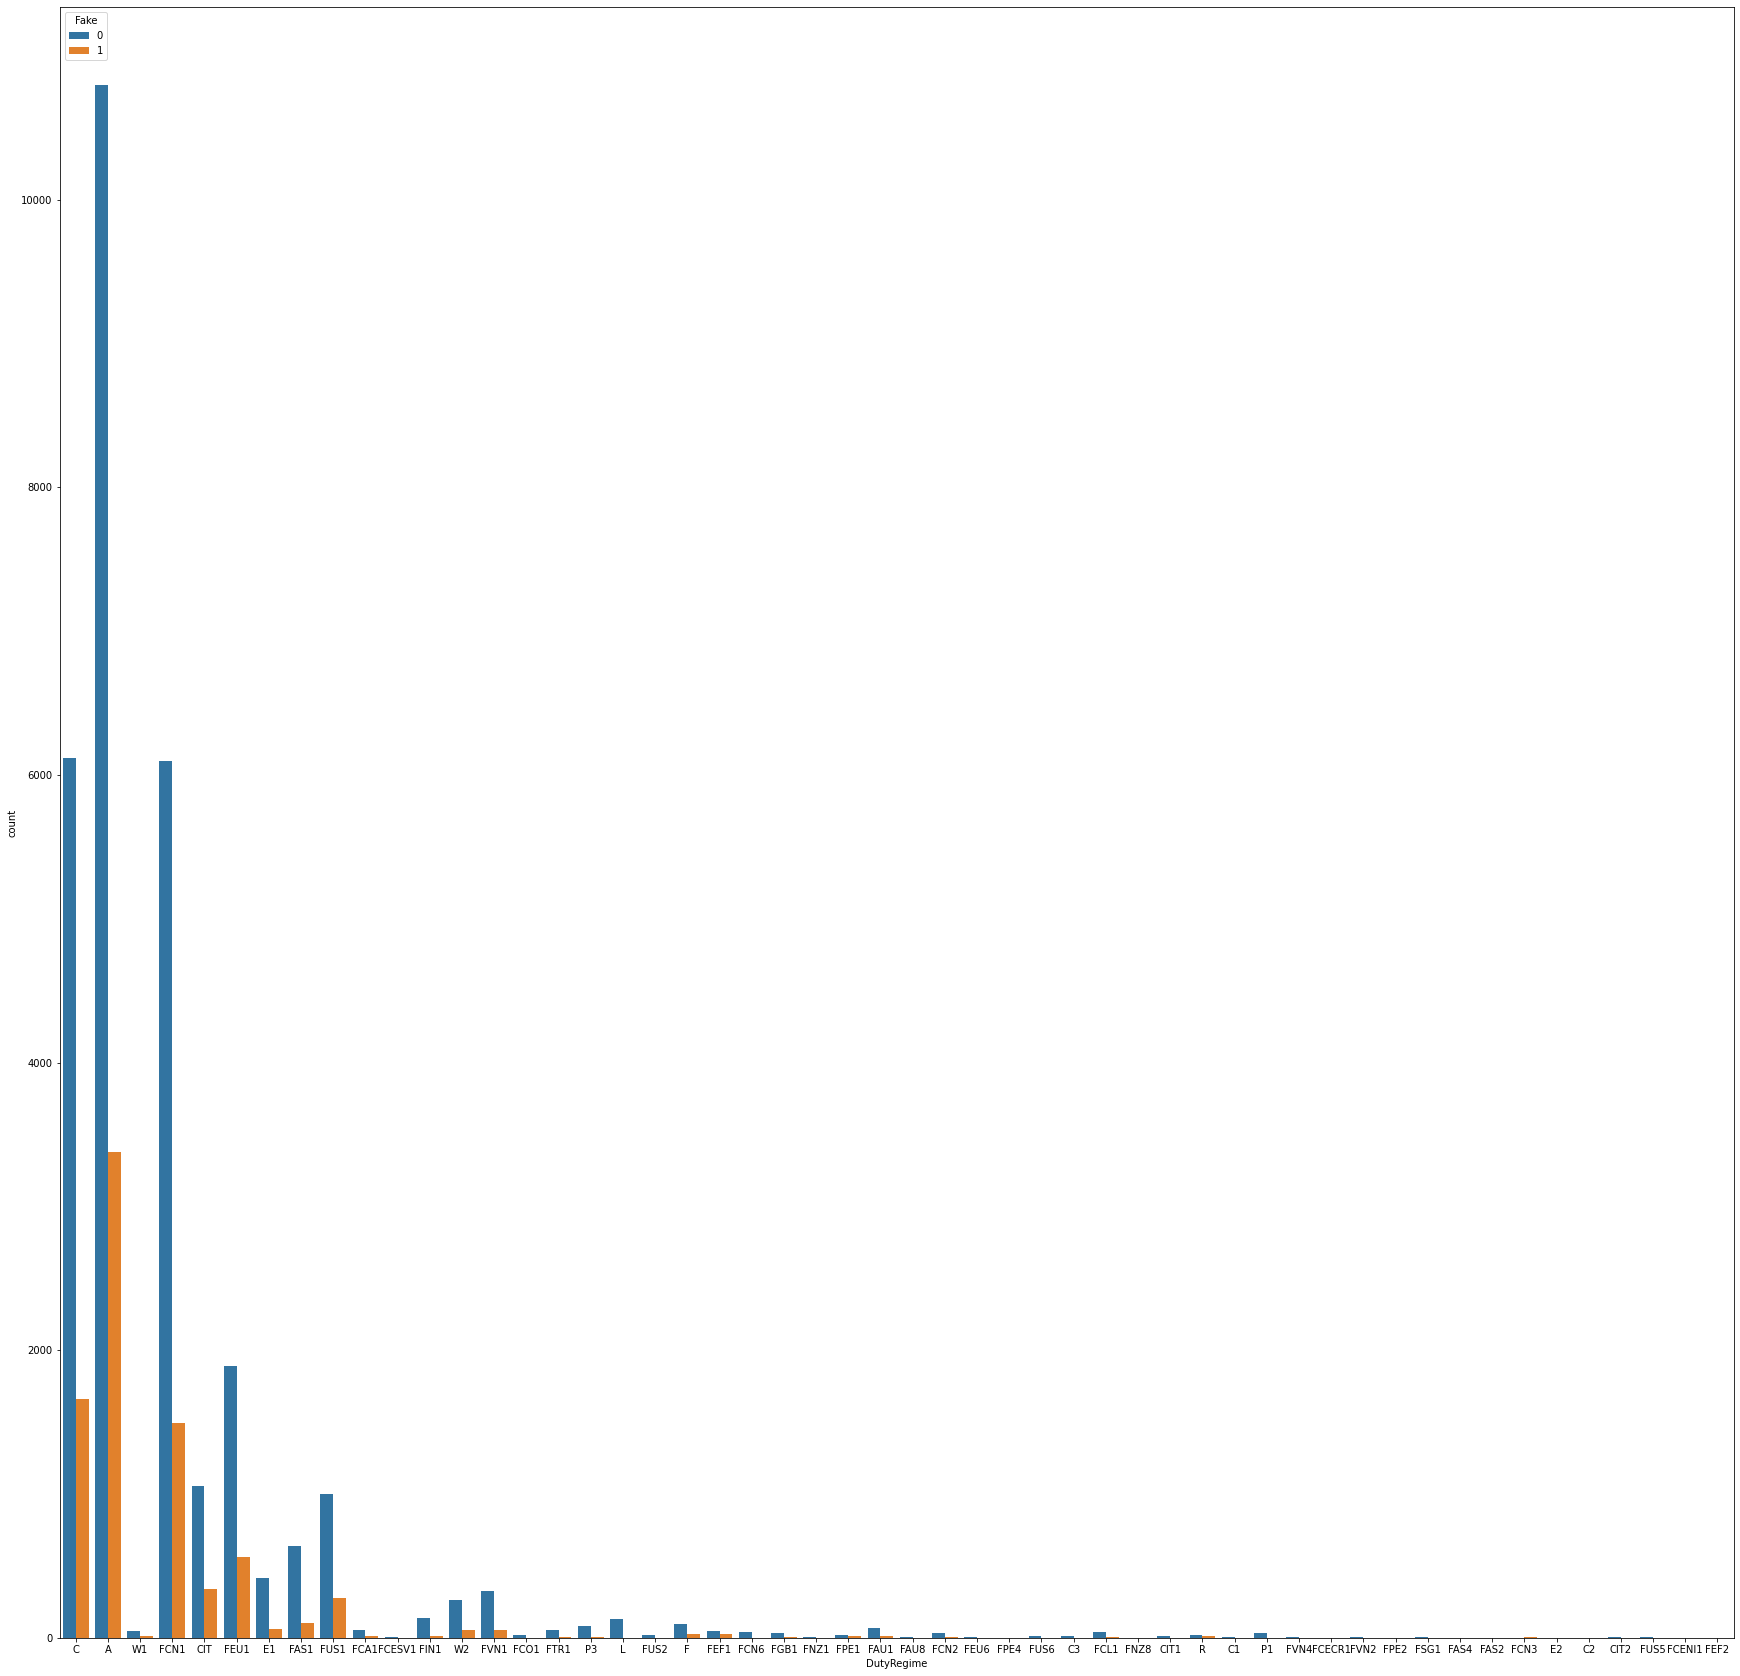

,Fake_percentage,value_counts
FAS4,100.000000,1
FNZ8,100.000000,2
FCN3,100.000000,3
FCECR1,50.000000,2
FPE1,40.740741,27
R,37.142857,35
FEF1,33.333333,72
CIT,24.229391,1395
A,23.838070,14179
W1,23.437500,64


In [ ]:
# let's draw the distribution of 'ExportationCountry' with 'fake'
plt.figure(figsize=(30,30))
sns.countplot(x='DutyRegime', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('DutyRegime')['Fake'].mean() * 100
value_counts = df_normed['DutyRegime'].value_counts().sort_index()
fake_vs_count = pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)
fake_vs_count

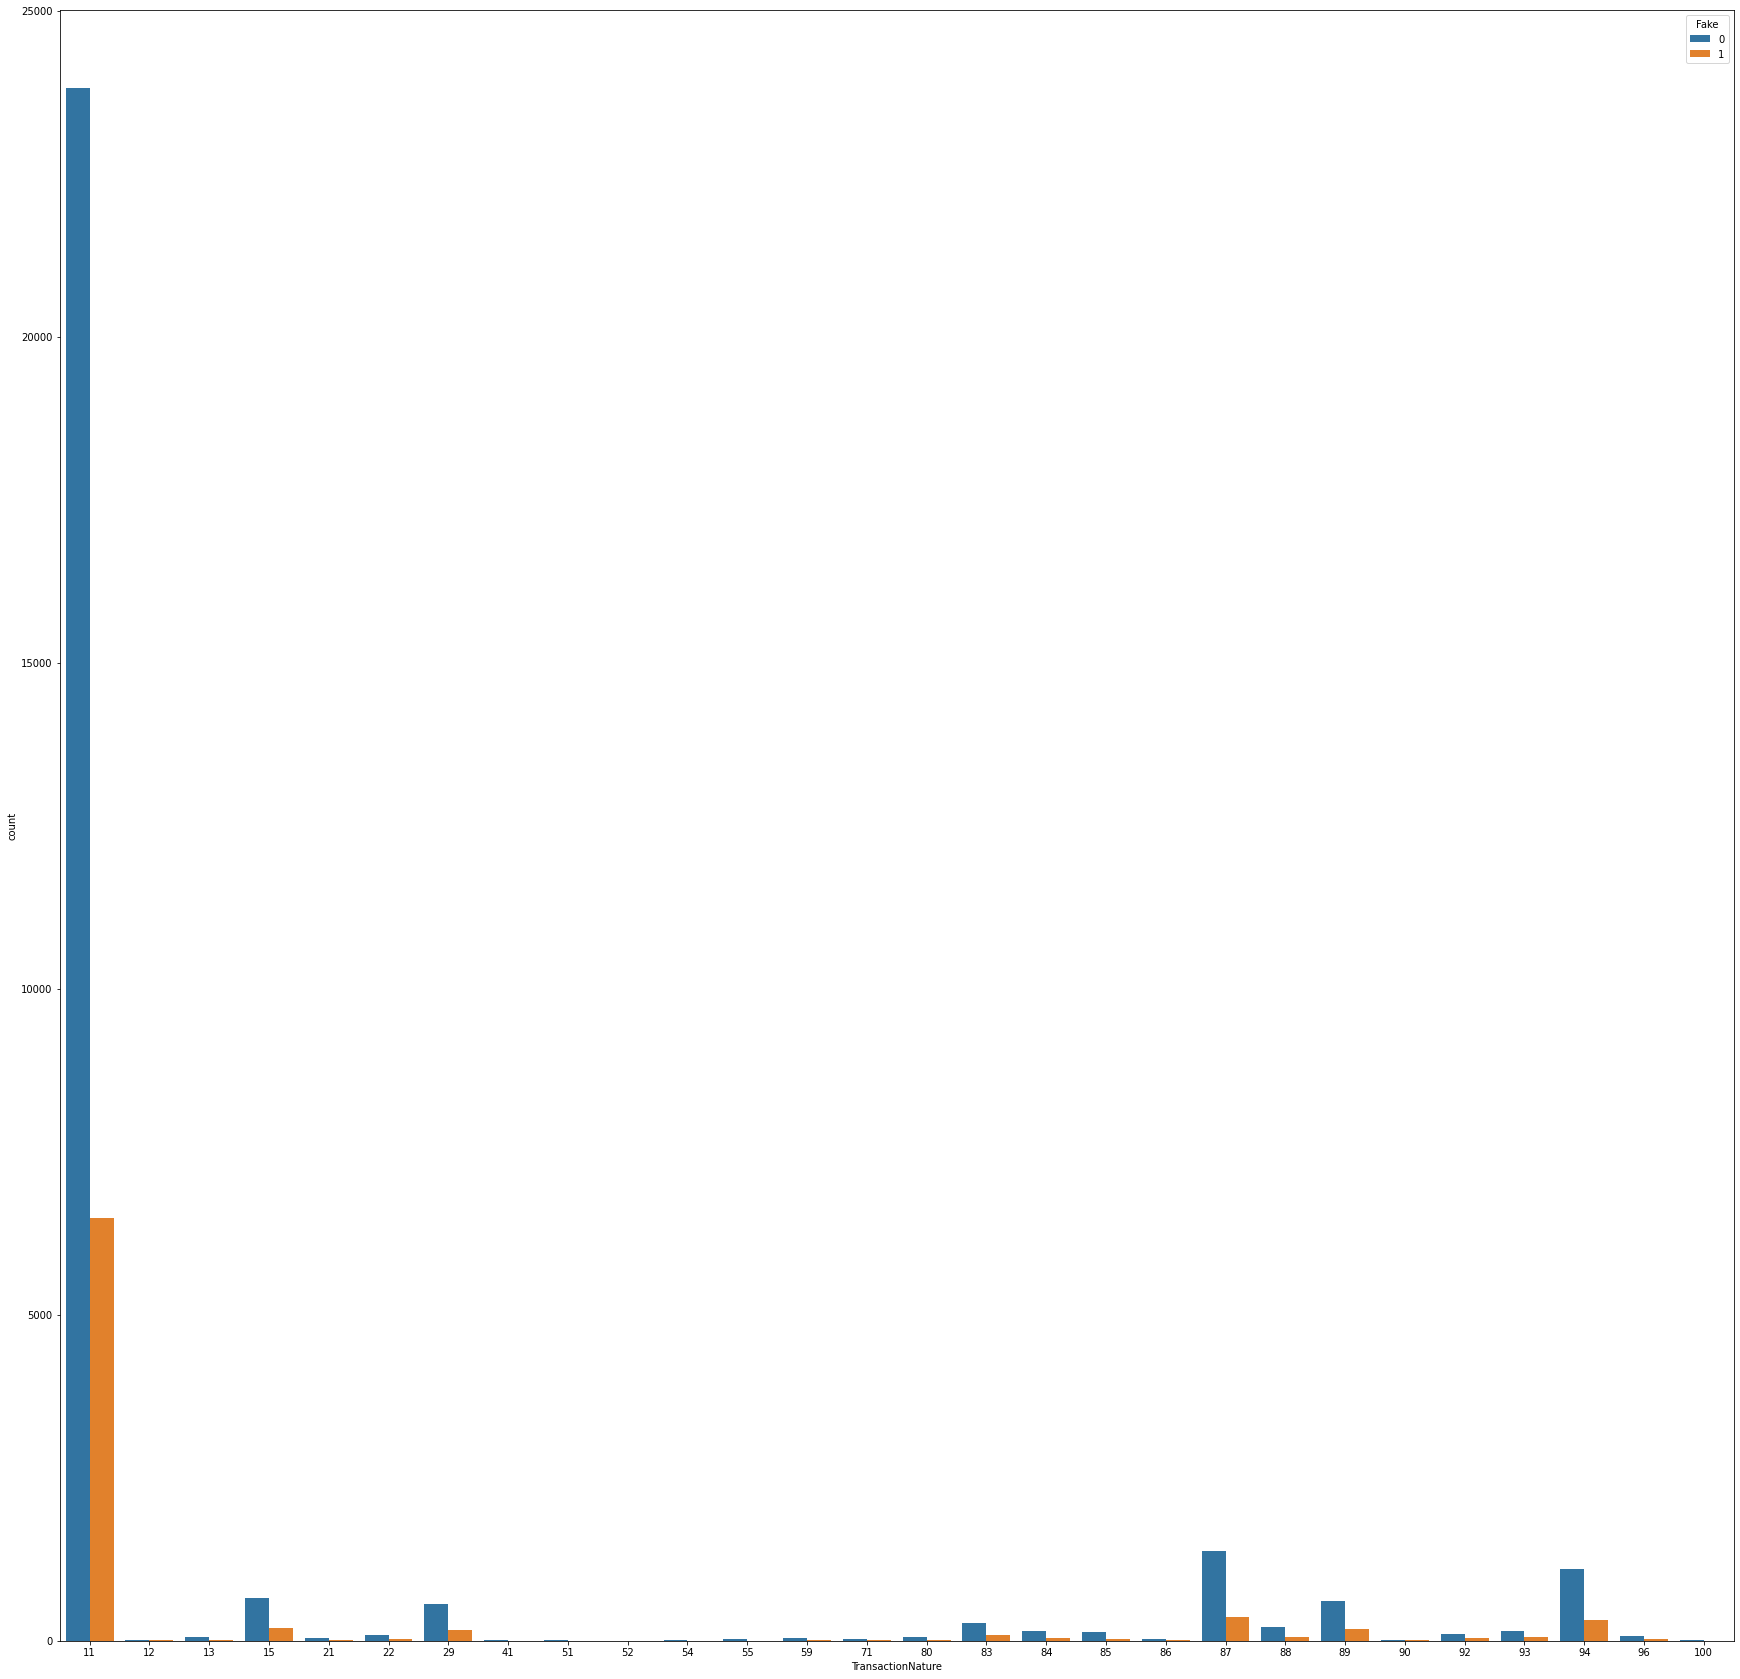

,Fake_percentage,value_counts
52,33.333333,3
12,30.434783,23
41,30.000000,10
100,27.272727,11
92,26.973684,152
51,26.666667,15
90,26.315789,19
93,25.365854,205
96,24.210526,95
83,24.157303,356


In [ ]:
# let's draw the distribution of 'ExportationCountry' with 'fake'
plt.figure(figsize=(30,30))
sns.countplot(x='TransactionNature', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('TransactionNature')['Fake'].mean() * 100
value_counts = df_normed['TransactionNature'].value_counts().sort_index()
fake_vs_count = pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)
fake_vs_count

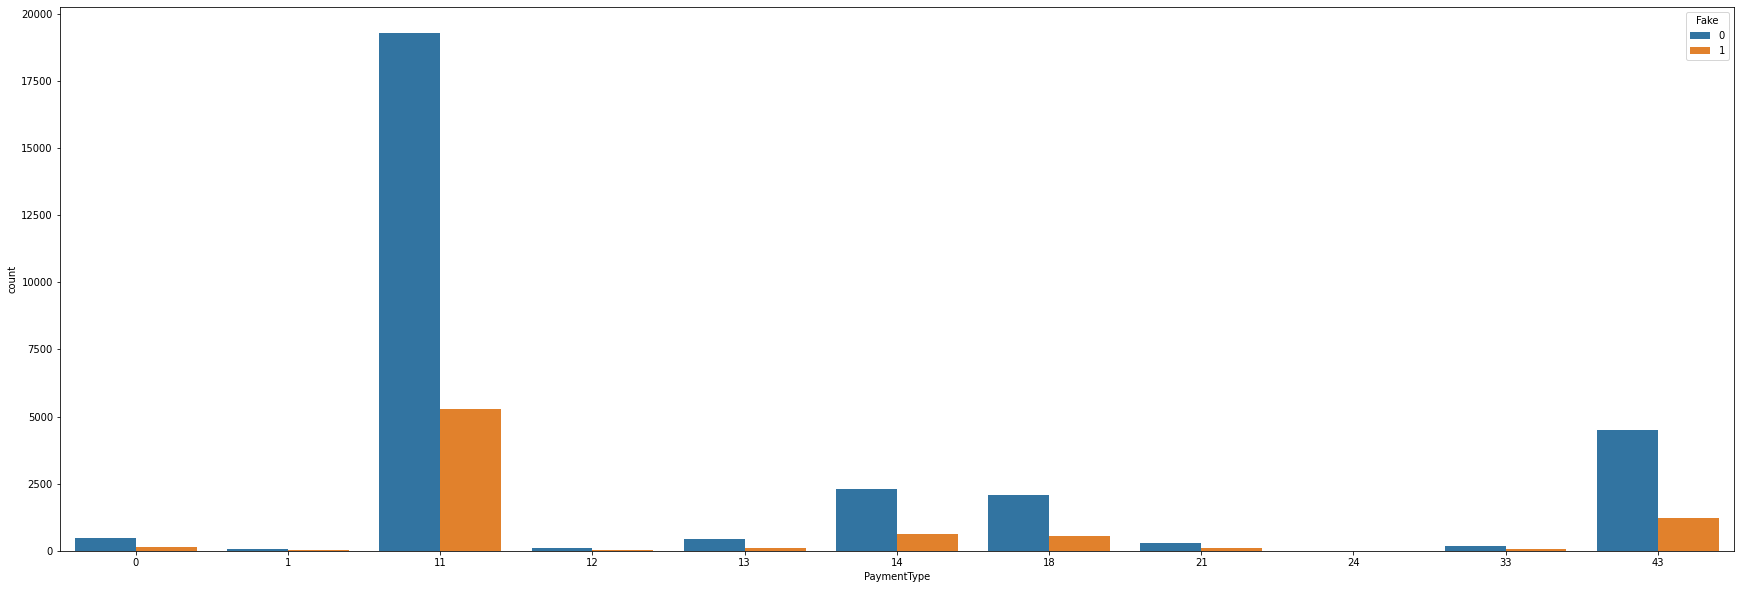

,Fake_percentage,value_counts
33,23.868313,243
1,23.529412,68
21,23.513514,370
0,21.864407,590
12,21.710526,152
18,21.572351,2633
11,21.546849,24579
14,21.431029,2907
43,21.419850,5733
13,20.856611,537


In [ ]:
# let's draw the distribution of 'ExportationCountry' with 'fake'
plt.figure(figsize=(30,10))
sns.countplot(x='PaymentType', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('PaymentType')['Fake'].mean() * 100
value_counts = df_normed['PaymentType'].value_counts().sort_index()
fake_vs_count = pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)
fake_vs_count

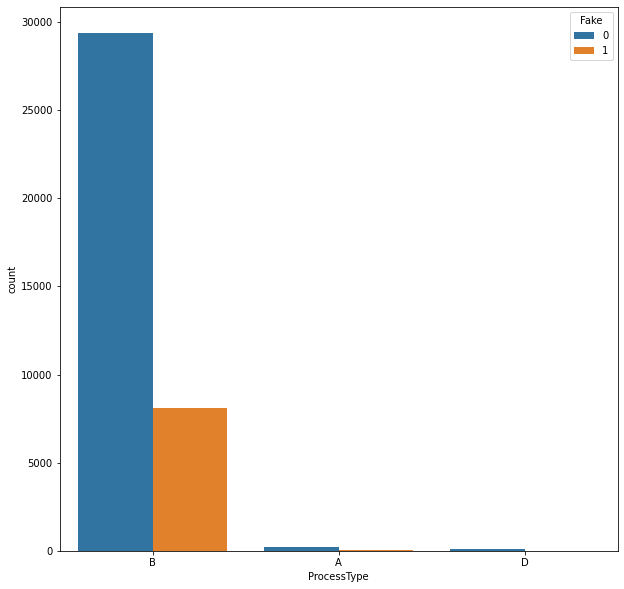

,Fake_percentage,value_counts
B,21.565538,37444
A,21.201413,283
D,17.894737,95


In [ ]:
# let's draw the distribution of 'ExportationCountry' with 'fake'
plt.figure(figsize=(10,10))
sns.countplot(x='ProcessType', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('ProcessType')['Fake'].mean() * 100
value_counts = df_normed['ProcessType'].value_counts().sort_index()
fake_vs_count = pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)
fake_vs_count

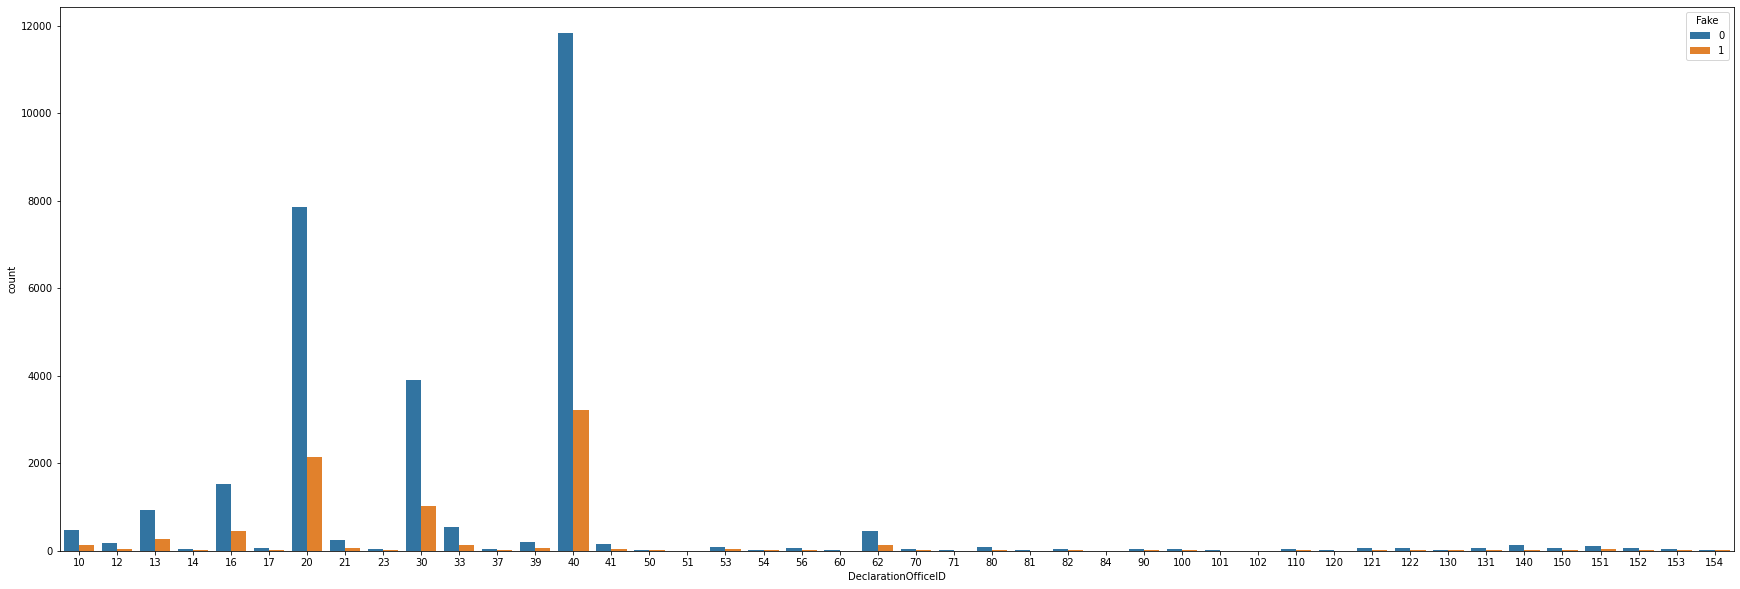

,Fake_percentage,value_counts
84,66.666667,3
23,32.692308,52
154,30.555556,36
50,30.000000,40
82,29.729730,74
54,29.411765,34
100,26.190476,42
17,25.974026,77
122,25.974026,77
130,25.641026,39


In [ ]:
# let's draw the distribution of 'ExportationCountry' with 'fake'
plt.figure(figsize=(30,10))
sns.countplot(x='DeclarationOfficeID', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('DeclarationOfficeID')['Fake'].mean() * 100
value_counts = df_normed['DeclarationOfficeID'].value_counts().sort_index()
fake_vs_count = pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)
fake_vs_count

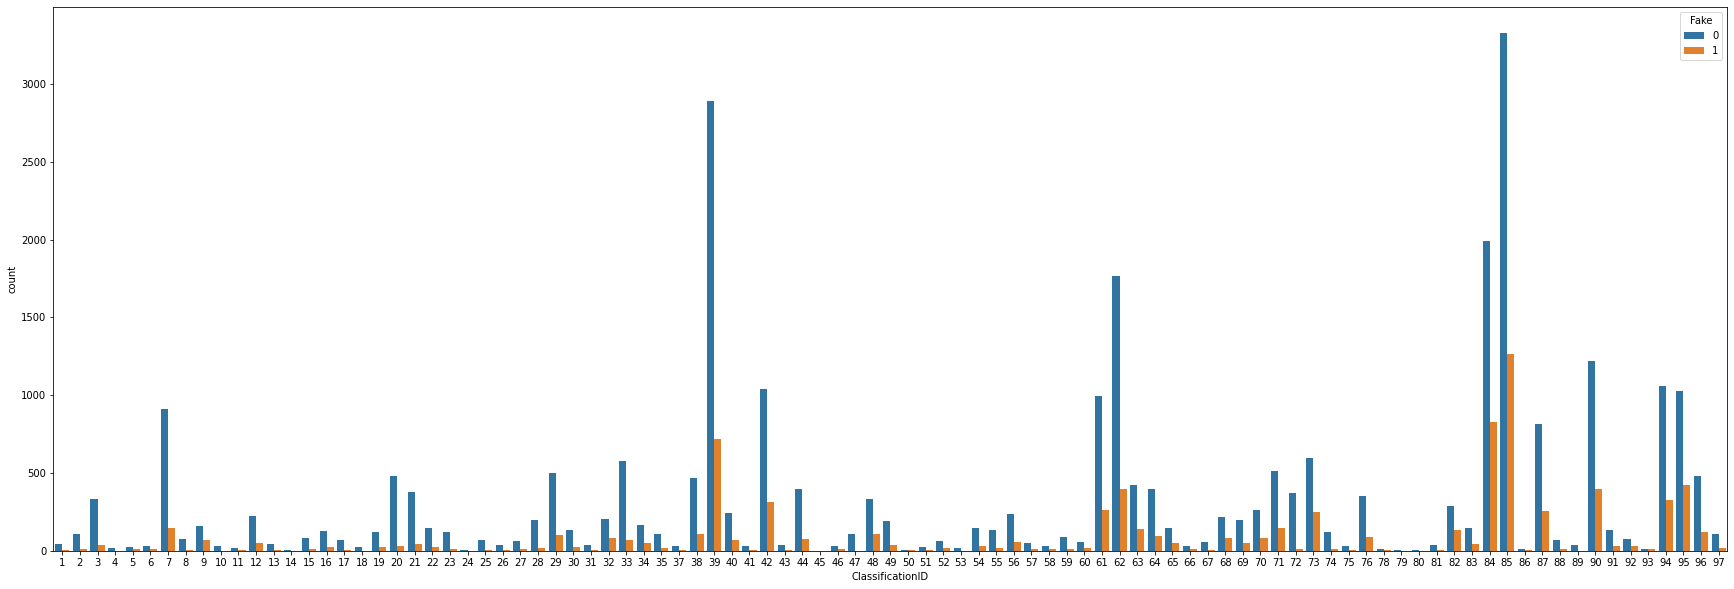

,Fake_percentage,value_counts
50,57.142857,14
93,50.000000,18
5,31.250000,32
82,31.190476,420
9,30.837004,227
...,...,...
24,0.000000,5
45,0.000000,1
80,0.000000,2
79,0.000000,6


In [ ]:
# let's draw the distribution of 'ExportationCountry' with 'fake'
plt.figure(figsize=(30,10))
sns.countplot(x='ClassificationID', hue='Fake', data=df_normed)
plt.show()
Fake_percentage = df_normed.groupby('ClassificationID')['Fake'].mean() * 100
value_counts = df_normed['ClassificationID'].value_counts().sort_index()
fake_vs_count = pd.DataFrame({'Fake_percentage': Fake_percentage, 'value_counts': value_counts}).sort_values(by='Fake_percentage', ascending=False)
fake_vs_count

In [ ]:
df_normed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37822 entries, 0 to 37821
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           37822 non-null  int64  
 1   IssueDateTime                37822 non-null  int64  
 2   DeclarationOfficeID          37822 non-null  int64  
 3   ProcessType                  37822 non-null  object 
 4   TransactionNature            37822 non-null  int64  
 5   Type                         37822 non-null  int64  
 6   PaymentType                  37822 non-null  int64  
 7   BorderTransportMeans         37822 non-null  int64  
 8   DeclarerID                   37822 non-null  object 
 9   ImporterID                   37822 non-null  object 
 10  ClassificationID             37822 non-null  int64  
 11  ExportationCountry           37822 non-null  object 
 12  OriginCountry                37822 non-null  object 
 13  TaxRate         

In [ ]:
# HO (null_hypothesis) : column A and B have no relationship
# H1 (alternate_hypothesis): They do have relationship
from scipy.stats import chi2_contingency
cat_cols = [col for col in df_normed.columns if df_normed[col].dtype != 'float64' and col not in ['Fake', 'DeclarerID', 'ImporterID', 'ID']]
for col in cat_cols:
  if chi2_contingency(pd.crosstab(df_normed[col], df_normed['Fake']))[1] < 0.05:
    print(col, '-> reject HO')
  else:
    print(col, '-> fail to reject HO')

IssueDateTime -> fail to reject HO
DeclarationOfficeID -> fail to reject HO
ProcessType -> fail to reject HO
TransactionNature -> fail to reject HO
Type -> fail to reject HO
PaymentType -> fail to reject HO
BorderTransportMeans -> fail to reject HO
ClassificationID -> reject HO
ExportationCountry -> reject HO
OriginCountry -> reject HO
DutyRegime -> reject HO
DisplayIndicator -> fail to reject HO


In [ ]:
label_encoded_cols = ['DutyRegime', 'ClassificationID', 'ExportationCountry', 'OriginCountry',]
target_encoded_cols = ['TransactionNature','Type',]
dropped_cols = ['BorderTransportMeans','DisplayIndicator','IssueDateTime','ProcessType', 'DeclarationOfficeID', 'DeclarerID', 'ImporterID', 'PaymentType']

In [ ]:
col_unique_dict = {col: list(df_normed[col].unique()) for col in label_encoded_cols}

In [ ]:
for col in label_encoded_cols:
  df_normed[col] = pd.factorize(df_normed[col], sort=True)[0]
for col in target_encoded_cols:
  df_normed[col] = df_normed.groupby(col)['Fake'].transform('mean')

In [ ]:
col_num_dict = {col: list(df_normed[col].unique()) for col in label_encoded_cols}

In [ ]:
# let's try removing some features
# df_normed = df_normed.drop(columns=['DeclarerID', 'ImporterID','DutyRegime', 'OriginCountry'])
df_normed = df_normed.drop(columns=dropped_cols)

# df_normed = df_normed.drop(columns=['DeclarationOfficeID', 'ProcessType',
      #  'TransactionNature', 'Type', 'PaymentType', 'DeclarerID', 'ImporterID'])
# df_normed['DeclarerID'].nunique()
df_normed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37822 entries, 0 to 37821
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           37822 non-null  int64  
 1   ClassificationID             37822 non-null  int64  
 2   ExportationCountry           37822 non-null  int64  
 3   OriginCountry                37822 non-null  int64  
 4   TaxRate                      37822 non-null  float64
 5   DutyRegime                   37822 non-null  int64  
 6   TotalGrossMassMeasure(KG)    37822 non-null  float64
 7   AdValoremTaxBaseAmount(Won)  37822 non-null  float64
 8   Fake                         37822 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.6 MB


In [ ]:
features = [col for col in df_normed.columns if col not in ['ID', 'Fake']]
label = 'Fake'
features

['ClassificationID',
 'ExportationCountry',
 'OriginCountry',
 'TaxRate',
 'DutyRegime',
 'TotalGrossMassMeasure(KG)',
 'AdValoremTaxBaseAmount(Won)']

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
models = ['xgb', 'rf', 'knn', 'log', 'svm', 'dec', 'nn']
model_dict = {model: 0 for model in models}
neural_net = MLPClassifier()
neural_net_param_grid = {'hidden_layer_sizes': [(10, 8)], 'activation': ['relu', 'logistic']}
xgb_model = XGBClassifier()
xgb_param_grid = {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 200]}
ran_f_param_grid = [
 {'n_estimators': [100, 200, 300], 'max_features': [8, 10]},
 ]
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors' : list(range(347, 348)), 'weights' : ['distance']}
logistic = LogisticRegression(max_iter=500)
log_param_grid = {'C': [0.01, 0.1, 1, 10, 100, 100000]}
forest_reg = RandomForestClassifier()
svm_model = SVC()
svm_param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'], 'C': [0.01, 0.1, 1, 10, 100, 1000]}
dec_model = DecisionTreeClassifier()
dec_param_grid = {'criterion' : ["gini", "entropy"]}

# grid_search = GridSearchCV(neural_net, neural_net_param_grid, cv=5, scoring='accuracy',return_train_score=True)
# grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy',return_train_score=True)
# grid_search = GridSearchCV(forest_reg, ran_f_param_grid, cv=5, scoring='accuracy',return_train_score=True)
grid_search = GridSearchCV(knn_model, knn_param_grid, cv=10, scoring='accuracy',return_train_score=True)
# grid_search = GridSearchCV(logistic, log_param_grid, cv=5, scoring='accuracy',return_train_score=True)
# grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy',return_train_score=True)
# grid_search = GridSearchCV(dec_model, dec_param_grid, cv=5, scoring='accuracy',return_train_score=True)
model_name = models[2]
# grid_search = grid_search_xgb
grid_search.fit(df_normed[features], df_normed[label])
cvres = grid_search.cv_results_

In [ ]:
scores = []
k_s = []
for (params, score) in zip(cvres['params'], cvres['mean_test_score']):
  print('Accuracy: ', score, ':-> parameters: ', params)
  scores.append(score)
  k_s.append(params['n_neighbors'])

Accuracy:  0.9212362760676258 :-> parameters:  {'n_neighbors': 347, 'weights': 'distance'}


In [ ]:
average_score = sum(scores)/ len(scores)
average_score

0.9212362760676258

In [ ]:
grid_search.best_estimator_, grid_search.best_score_

(KNeighborsClassifier(n_neighbors=347, weights='distance'), 0.9212362760676258)

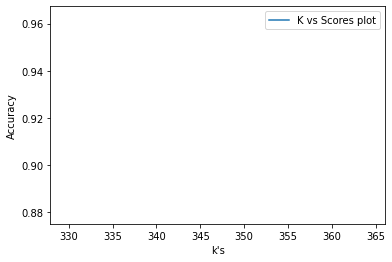

In [ ]:
#plot k-versus-score graph
def plot_k_vs_score_curve(k_s, scores):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("k's")
  plt.ylabel("Accuracy")

  plt.plot(k_s, scores, label="K vs Scores plot")
  plt.legend()

  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other k_s.
  highest_score = max(scores)
  lowest_score = min(scores)
  delta = highest_score - lowest_score

  top_of_y_axis = highest_score + (delta * 0.05)
  bottom_of_y_axis = lowest_score - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()
plot_k_vs_score_curve(k_s, scores)

In [ ]:
df_normed

,ID,ClassificationID,ExportationCountry,OriginCountry,TaxRate,DutyRegime,TotalGrossMassMeasure(KG),AdValoremTaxBaseAmount(Won),Fake
0,72084586,93,51,49,0.0,1,5742.6,2274643.86,0
1,40435069,92,14,15,8.0,0,21.0,285.60,0
2,55727128,11,14,15,5.0,50,38000.0,16302000.00,0
3,59584234,63,14,15,0.0,21,798.0,49635.60,0
4,81704651,82,39,15,2.2,5,170.9,24917.22,0
...,...,...,...,...,...,...,...,...,...
37817,97825407,60,14,15,5.2,21,10.0,583.00,0
37818,52016133,82,14,15,0.0,5,7.0,14179.20,0
37819,47048702,21,30,28,0.0,28,1728.0,41472.00,0
37820,30000766,87,51,49,1.3,1,5.0,8630.50,1


In [ ]:
test_df = pd.read_csv(test_path)
dropped_df = test_df.drop(columns=['SellerID', 'ExpressID'])
dropped_df['ExportationCountry'].fillna(dropped_df['ExportationCountry'].mode()[0], inplace=True)
dropped_df['OriginCountry'].fillna(dropped_df['OriginCountry'].mode()[0], inplace=True)

In [ ]:
df_normed_test = dropped_df.copy()
# df_normed_test[numerical_cols] = scaler.fit_transform(dropped_df[numerical_cols])
df_normed_test['IssueDateTime'] = pd.to_datetime(df_normed_test['IssueDateTime']).dt.month
# how about normalizing using 'standardscaler'
df_normed_test['ClassificationID'] = (df_normed_test['ClassificationID'] // (1e8)).astype(int)

In [ ]:
# df_normed_test['is_also_origin'] = df_normed_test['ExportationCountry'] == df_normed_test['OriginCountry']
# df_normed_test['is_also_origin'] = df_normed_test['is_also_origin'].apply(lambda x : 1 if x == True else 0)

In [ ]:
# processed_cols = label_encoded_cols + target_encoded_cols
for col in label_encoded_cols:
  # df_normed_test[col] = pd.factorize(df_normed_test[col], sort=True)[0]
  df_normed_test[col] = df_normed_test[col].apply(lambda x : -1 if x not in col_unique_dict[col] else col_num_dict[col][col_unique_dict[col].index(x)])
for col in target_encoded_cols:
  df_normed_test[col] = df_normed.groupby(col)['Fake'].transform('mean')

In [ ]:
df_normed_test = df_normed_test.drop(columns=dropped_cols)

In [ ]:
df_normed_test.columns

Index(['ID', 'ClassificationID', 'ExportationCountry', 'OriginCountry',
       'TaxRate', 'DutyRegime', 'TotalGrossMassMeasure(KG)',
       'AdValoremTaxBaseAmount(Won)'],
      dtype='object')

In [ ]:
features = df_normed_test.columns[1:]
prediction = grid_search.best_estimator_.predict(df_normed_test[features])

In [ ]:
import datetime
datetime_obj = datetime.datetime.now()
mon, day, hour, minute, sec = datetime_obj.month, datetime_obj.day, datetime_obj.hour, datetime_obj.minute, datetime_obj.second
my_day_format = f'{mon}_{day} {hour}{minute}{sec}'

In [ ]:
output = pd.DataFrame({'ID': df_normed_test['ID'], 'Fake': prediction})
output.to_csv(f'/content/{model_name}_{int(average_score * 100)}_{my_day_format}.csv', index=False)
# output.to_csv(f'/content/my_prediction.csv', index=False)